# Predicting social media performance metrics

## Introduction

This project is inspired by an article written by Sérgio Moro, Paulo Rita and Bernardo Vala, from the Institute of Lisbon, Portugal. In their paper $\footnote{(Moro et al., 2016) Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research, 69(9), 3341-3351.}$, they try to predict the performance metrics of posts published in brands' Facebook pages.

Nowadays, advertising on social media has never been that important. Companies are understanding that there's a shift in habits between baby-boomers and millenials. As a matter of fact, half of all the millenials and Generation X don't watch any content on TV ( http://adage.com/article/media/half-young-consumers-watching-content-traditional-tv-study/310564/ ). Half of the adults between 22 and 45 years old indeed would use a TV just to display their computer's or Phone content, as well as use Netflix or watch YouTube videos. As a consequence, marketers are aiming for social media as a new way to get heard of. Plus, having nowadays 2.6 Billion people on social media is like having a pot of gold for companies who wish to do marketting, and that number is previewed to grow to 3 Billion in 2021 (https://www.statista.com/statistics/278414/number-of-worldwide-social-network-users/).

In this context, understanding what makes a product interesting on social media could leverage managerial decisions to improve brand recognition. Advertising managers could make judged decisions on the
receptiveness of the posts published, thus aligning strategies toward
optimizing the impact of posts, benefiting from the predictions made.

The research team focused on predicting the impact of publishing individual posts on a social media network company's page. The impact is measured through several available metrics related to customer visualizations and interactions. The predictive knowledge found enables to support manager's decisions on whether to publish each post. The data base used was found on \url{https://archive.ics.uci.edu/ml/datasets.html} and corresponds indeed to several posts on Facebook of cosmetic brands. We shall use techniques learnt in class in order to understand what impacts a Facebook post to be popular. Our goal is to be able to predict as accurately as possible ...

The next section explains the database used, and has some descriptive statistics. The following section will be the comparaison of several machine learning models and conclusion on their effectiveness on the dataset. Finally, the last section draws the main conclusions of this report. 

## Analysing the Database - Descriptive Statistics

Using Python, we will be reading the database and see what variables are in the database and how they interact with each other.

All posts come from the same cosmetic brand during the year 2014.

###### Imports

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from pandas import ExcelWriter
import scipy 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import export_graphviz
from IPython.display import Image

%matplotlib inline

###### Reading CSV

In [2]:
path = 'F:\\3A\S1\Apprentissage Statistique\Projet'
file = "\dataset_Facebook.csv"

df = pd.read_csv((path+file).replace('\\','/'), sep = ';')
df.dropna(inplace=True)
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


There are 19 variables, 495 posts after deleting missing values (from 500 originally). 7 variables will be used as regressors in order to understand the 12 others.

Here's is a variable dictionary to understand better :

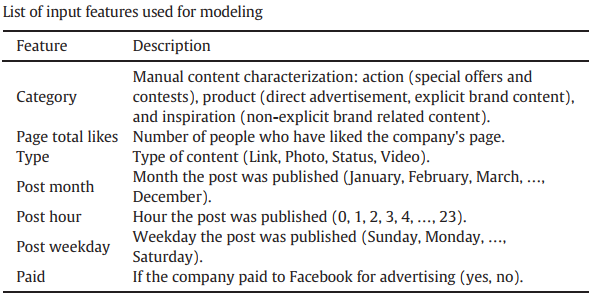

In [3]:
Image("Input_Variables.PNG")

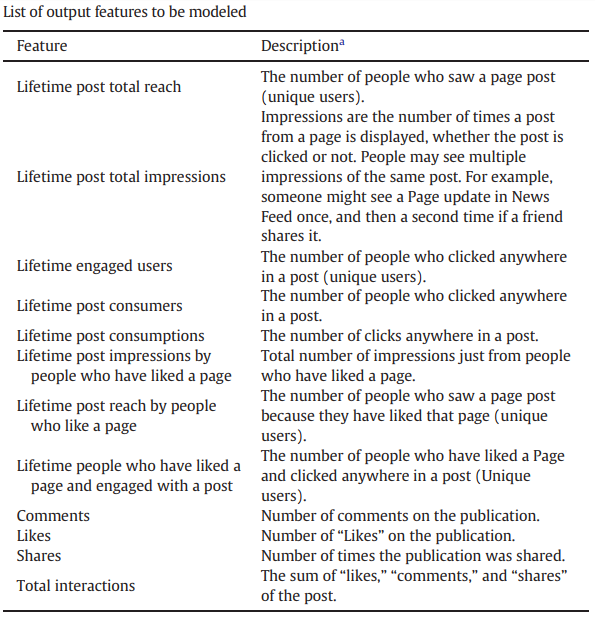

In [4]:
Image("Output_Variables.PNG")

###### Descriptive Statistics

Here is a first analysis of the regressors, thanks to histograms :

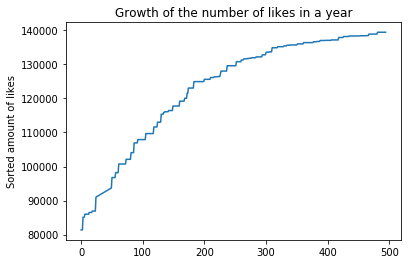

In [5]:
plt.plot(sorted(df['Page total likes']))
plt.ylabel('Sorted amount of likes')
plt.title("Growth of the number of likes in a year")
plt.show()

In [6]:
df['Category'].value_counts()

1    211
3    155
2    129
Name: Category, dtype: int64

In [7]:
df['Type'].value_counts()

Photo     421
Status     45
Link       22
Video       7
Name: Type, dtype: int64

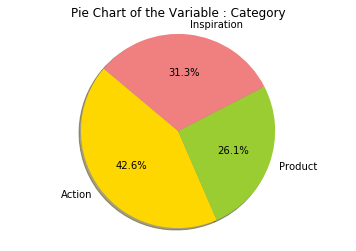

In [8]:
labels = 'Action', 'Product', 'Inspiration'
values = df['Category'].value_counts()
sizes = [values[1], values[2],values[3]]
colors = ['gold', 'yellowgreen', 'lightcoral']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart of the Variable : Category')
plt.axis('equal')
plt.show()

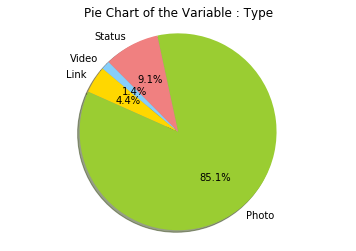

In [9]:
labels = 'Link', 'Photo', 'Status','Video'
values = df['Type'].value_counts()
sizes = [values[labels[0]], values[labels[1]],values[labels[2]],values[labels[3]]]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Pie Chart of the Variable : Type')
plt.axis('equal')
plt.show()

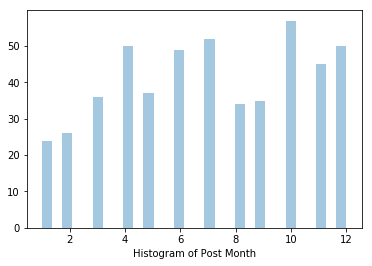

In [10]:
sns.distplot(df['Post Month'], axlabel = 'Histogram of Post Month', kde=False,bins=30);

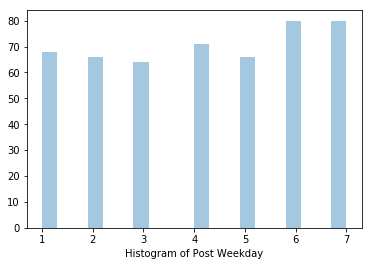

In [11]:
sns.distplot(df['Post Weekday'], axlabel = 'Histogram of Post Weekday', kde=False,bins=20);

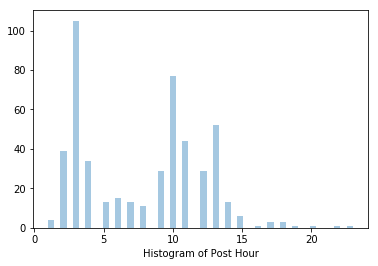

In [12]:
sns.distplot(df['Post Hour'], axlabel = 'Histogram of Post Hour', kde=False,bins=50);

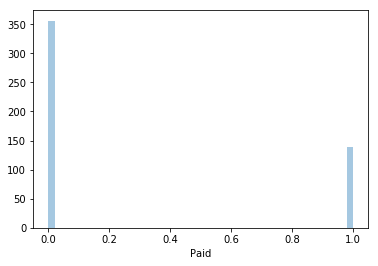

In [13]:
sns.distplot(df['Paid'], axlabel = 'Paid', kde=False,bins=50);

From these histograms, several conclusions can be made.

First of all, is that there is that the number of likes inscreases, up until half of the year where the increase becomes slower. Then, there has been more posts during Spring and Autumn. There seems to be slighly more posts during the weekend, but not significatively as much as during the week. Very interesting in fact that most posts are done at 3AM. It could be because of two community mangers working in two different countries with time differences, or because of a programmed post. Then there are more posts around 10 AM and around lunch time at 1PM. Almost no posts are done in the evening or at night. Probably because people who are in charge of posting don't work 24hours a day. Almost all the posts are about photos, and concern a special offer or contest. Lastly, around 30% of all posts are paid advertisement to Facebook.

Concerning the other variables, their distribution all look the same, so as a matter of conciceness here is only the graph of one of the 12 variables:

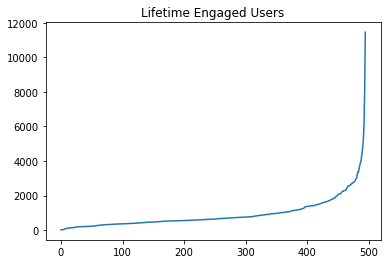

In [14]:
col = 'Lifetime Engaged Users'
plt.plot(sorted(df[col]))
plt.title(col)
plt.show()

Indeed, all of the 12 variables have this exponential looking shape. It is then interesting to crosse regressors and thee variables to understand if there's a possible relation between both.


###### Boxplots

We don't show every boxplot plotted, only those judged interesting and significant.

In [15]:
def boxplot(i,j,df):
    ax = sns.boxplot(x=i, y=j, data=df)
    if len(j)>66:
        j = "Lifetime People - Page liked - Post engaged in"
    plt.ylabel(j)
    plt.title(str(i)+" VS "+str(j))
    plt.tight_layout()
    plt.show()

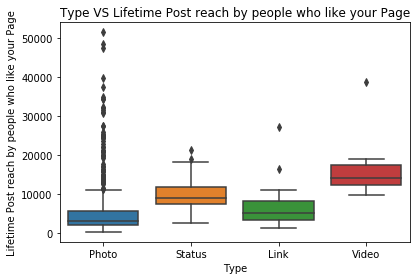

In [16]:
boxplot("Type", "Lifetime Post reach by people who like your Page",df)

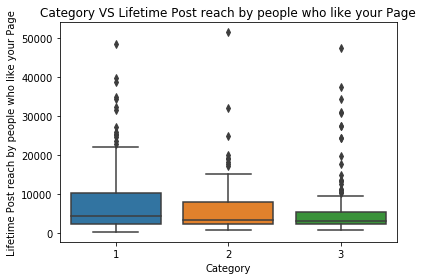

In [17]:
boxplot("Category", "Lifetime Post reach by people who like your Page",df)

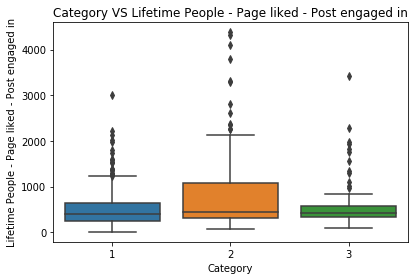

In [18]:
boxplot("Category", "Lifetime People who have liked your Page and engaged with your post",df)

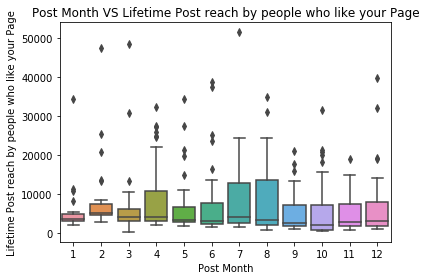

In [19]:
boxplot("Post Month", "Lifetime Post reach by people who like your Page",df)

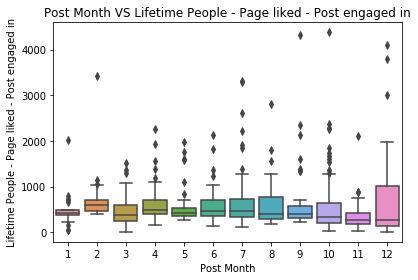

In [20]:
boxplot( "Post Month", "Lifetime People who have liked your Page and engaged with your post",df)

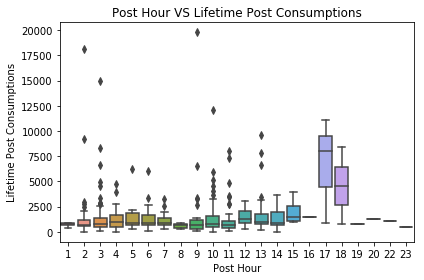

In [21]:
boxplot("Post Hour", "Lifetime Post Consumptions",df)

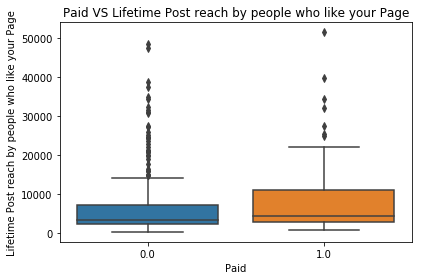

In [22]:
boxplot("Paid", "Lifetime Post reach by people who like your Page",df)

After looking at all the boxplots, we only select a few here for comment. Usually since there are a lot of photos, the boxplot tends to be well spread out. Which isn't the case for status posts which seem to get more attention than links and videos. It could be because when it's a photo, people just see as another add on their Facebook feed and don't spend much attention to it. So depending on the photo, there is a lot of attention and popularity, but that seems to be more true on average when it comes to status posts or videos.

It also seems to be the Action part of the Category that gets more popular then the Products or Inspiration part. Although the difference isn't clear exactly. It is unclear because it isn't always Action that gets the most attention. For example, it's when it's a product that people engage most with the post, and that there tends to be more likes, shares and comments. 

In terms of Months, there isn't a significative change. Yet we must note that for some variables, the post being posted in Summer had a role in its popularity. Surely because of the content. For the weekday, same result, there isn't a special weekday that makes posts more popular than the others. Perhaps it's interesting to note outliers come up more often on Mondays and Thursdays. However, during the day, there is clearly a difference in number of clicks on the post if the post is posted around 5-6PM. That's when people get off work and can check their phones during commute, perhaps.

Finally, paid advertising seems to reach on average more people.

###### Correlation Plot

Let's look at the only numerical variable we have, the total likes of the Facebook page through time, and determine its correlation with our variables of interests.

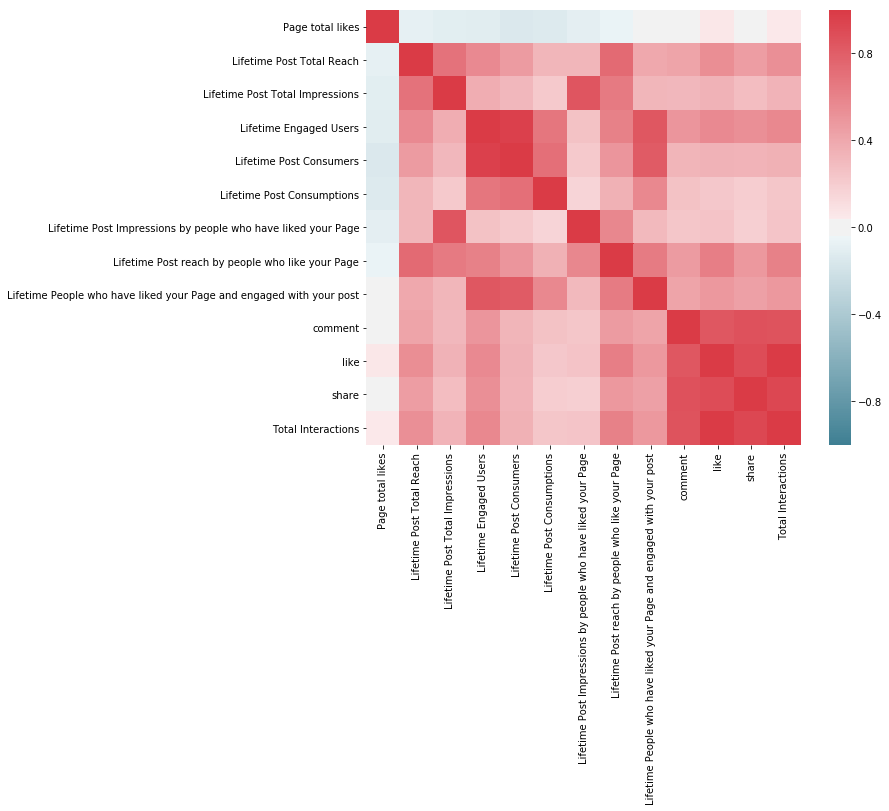

In [23]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.drop(df.columns[2:7], axis=1).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,  vmin=-1, vmax=1)

We can therfore see that the number of likes of the page isn't a determening factor since its correlations to every other variable are all under 0.1.

## Preparing the Databases

From seeing the database, we shall then use the same input variables as the article, and try to predict on the output variables. The article focuses on SVM, we shall see if we can do better or not with other methods.

In [24]:
df_regressors = df.iloc[:, 0:7]
df_others = df.iloc[:, 7:19]

However, we need to transform the categorical variables into dummy variables. We must be careful in choosing not all the modalities of a variable in order not to deal with multicolinearity.

In [25]:
cat = ['Type', 'Category', 'Post Month', 'Post Weekday', 'Post Hour']
df_regressors[cat] = df_regressors[cat].applymap(str)

just_dummies = pd.get_dummies(df_regressors[cat])
just_dummies.drop(['Type_Video','Category_3',
                             'Post Month_1','Post Weekday_1','Post Hour_1'],axis = 1, inplace=True)

df_regressors = pd.concat([df_regressors, just_dummies], axis=1) 
df_regressors.drop(cat,axis = 1, inplace = True)

The control group is therefore a post of a video in January on a Monday at 1 AM about a non-explicit brand related content.

We proceed in also taking the log of the response variables. This decision is based on how the data looks, and has many outliers and heavy tails. Here is an example of some distributions.

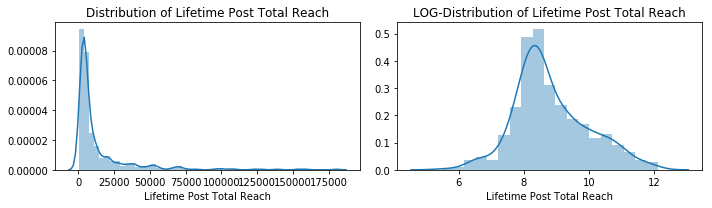

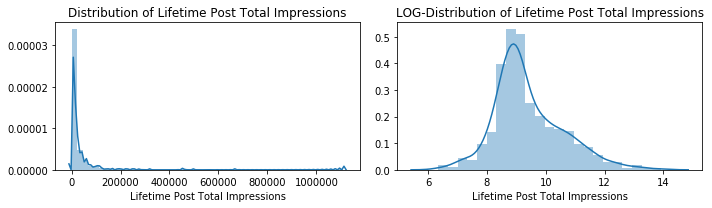

In [26]:
for col in list(df_others)[:2]:
        plt.figure(figsize=(10, 3))
        plt.subplot(1, 2, 1)
        plt.title('Distribution of '+str(col))
        sns.distplot(df[col], axlabel = col);
        plt.tight_layout()
        plt.subplot(1, 2, 2)
        plt.title('LOG-Distribution of '+str(col))
        sns.distplot(np.log(df[col]+1), axlabel = col);
        plt.tight_layout()
        plt.show()        

And so we take the natural logarithm of all the variables of interests :

In [27]:
for col in list(df_others):
    df_others.loc[:,col]= np.log(df_others.loc[:,col]+1)

Therefore, we have 45 regressors, upon which we will regress in order to explain the natural logarithm of 12 responses variables. 

We start by defining a train and test sample :

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_regressors, df_others, test_size=0.2, random_state=42)

In [29]:
X_train.head()

,Page total likes,Paid,Type_Link,Type_Photo,Type_Status,Category_1,Category_2,Post Month_10,Post Month_11,Post Month_12,...,Post Hour_20,Post Hour_22,Post Hour_23,Post Hour_3,Post Hour_4,Post Hour_5,Post Hour_6,Post Hour_7,Post Hour_8,Post Hour_9
333,119198,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56,138329,0.0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
356,116435,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
226,131728,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
443,96749,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Regression Models

We cannot show the results for all the 12 variables. Nevertheless, the idea is the same : we perform linear regression, then LASSO regression, KNN regression, and finally Random Forest regression.

A good model implies fitting all the input data in a way that the predicted values are as close as possible to the real values. Hence, first shall be computed the absolute difference between the predicted values and the real values for each post. Then will be computed the difference in percentage to assess the relative deviation of the predictions. Finally is calculated the mean absolute percentage error for each model, which is a metric widely used to evaluate regression model's performance based on the relative difference.

Since the article focuses on MAPE (Mean Absolte Percentage Error), we shall use this metric.

In [30]:
def maperror(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

###### Linear Regression

In [31]:
VAR = df_others.columns[3] 
data = pd.concat([df_regressors, df_others[VAR]], axis = 1)
data.columns = [c.replace(' ', '_') for c in data.columns]
variables = list(data)
variables.remove(str(VAR).replace(' ', '_'))
col = ' + '.join(variables)

model = smf.ols(formula=str(VAR).replace(' ', '_')+' ~ '+str(col), data=data) 
reg = model.fit()
print(reg.summary())

                               OLS Regression Results                              
Dep. Variable:     Lifetime_Post_Consumers   R-squared:                       0.439
Model:                                 OLS   Adj. R-squared:                  0.382
Method:                      Least Squares   F-statistic:                     7.793
Date:                     Tue, 30 Jan 2018   Prob (F-statistic):           5.14e-34
Time:                             00:14:02   Log-Likelihood:                -502.99
No. Observations:                      495   AIC:                             1098.
Df Residuals:                          449   BIC:                             1291.
Df Model:                               45                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Despite the Adjusted R-squared being very low, at 0.30, we can still make some remarks.

First, many coefficients have a standard too high to correctly be estimated. That is the case of the Post Hours variables, as well as for the Post Weekday and Post Month. 

However, we can be at least 95% sure that between a post that wasn't paid and one that was, there could be 15% more people who click anywhere in the post. In addition, if the post was a link and not a video, there could be 214% less people who click anywhere in the post. 

Now that we have a linear regression

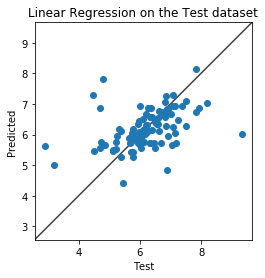

MAPE is 10.2373688802 
R-squared is 0.429668083199 


In [32]:
i = 3 # For Lifetime_Post_Consumers
LineReg = LinearRegression()
LineReg.fit(X_train,y_train.iloc[:,i])
y_pred = LineReg.predict(X_test)


fig, ax = plt.subplots()


ax.scatter(y_test.iloc[:,i],y_pred)

plt.ylabel('Predicted')
plt.title('Linear Regression on the Test dataset')
plt.xlabel('Test')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

mape = maperror(y_test.iloc[:,i],y_pred)
print("MAPE is %s " % mape)

slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred, y_test.iloc[:,i])
print("R-squared is %s " % r_value)

For the linear regression, the MAPE is at $10.2\%$. It cannot be compared with the numbers in the article because we have taken the natural log of the response variables. So, MAPE metrics will be lower.

###### LASSO

LASSO is a type of regression used for penalizing models with two many variables. Let's how it works on our data. 

In [33]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return rmse

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

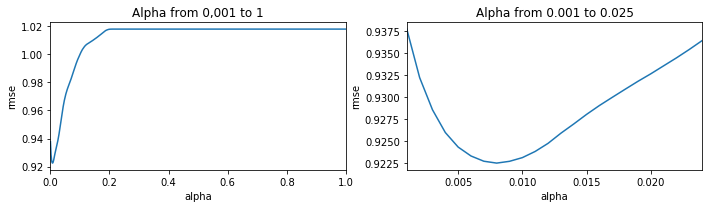

In [34]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
alphas = [i/1000 for i in range(1,1000)]#+[1+j for j in range(10)]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Alpha from 0,001 to 1")
plt.tight_layout()
plt.xlabel("alpha")
plt.ylabel("rmse")

plt.subplot(1, 2, 2)
alphas = [i/1000 for i in range(1,25)]#+[1+j for j in range(10)]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Alpha from 0.001 to 0.025")
plt.tight_layout()
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.show()        

Cross-Validation makes us choose alpha = 0.008 . 

In [35]:
y_train.iloc[:,i].head()

333    6.329721
56     5.323010
356    6.177944
226    5.837730
443    6.322565
Name: Lifetime Post Consumers, dtype: float64

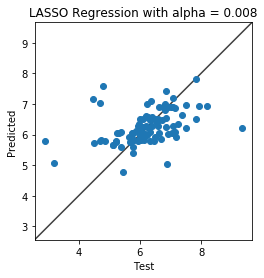

MAPE is 10.103091901 
R-squared is 0.434304921994 


In [36]:
i = 3 # For Lifetime_Post_Consumers
lassoreg = Lasso(alpha=0.008,normalize=False, max_iter=1e5)
lassoreg.fit(X_train,y_train.iloc[:,i])
y_pred = lassoreg.predict(X_test)

fig, ax = plt.subplots()


ax.scatter(y_test.iloc[:,i],y_pred)

plt.ylabel('Predicted')
plt.title('LASSO Regression with alpha = 0.008')
plt.xlabel('Test')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

mape = maperror(y_test.iloc[:,i],y_pred)
print("MAPE is %s " % mape)

slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred, y_test.iloc[:,i])
print("R-squared is %s " % r_value)

Predictions are slightly better, in the sense that MAPE is lower, and R-squared is slightly higher.

# KNN

Now we try to perform a regression thanks to the k-Nearest Neighbours algorithm. We shall once again perform a cross-validation, but on the number of numbers k.

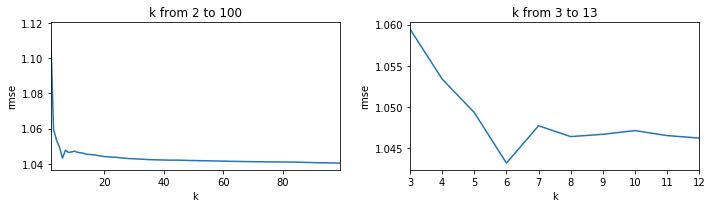

In [37]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
knn = [i for i in range(2,100)]#+[1+j for j in range(10)]
cv_knn = [rmse_cv(neighbors.KNeighborsRegressor(k, weights='distance')).mean() 
            for k in knn]

cv_knn = pd.Series(cv_knn, index = knn)
cv_knn.plot(title = "k from 2 to 100")
plt.xlabel("k")
plt.ylabel("rmse")


plt.subplot(1, 2, 2)
knn = [i for i in range(3,13)]#+[1+j for j in range(10)]
cv_knn = [rmse_cv(neighbors.KNeighborsRegressor(k, weights='distance')).mean() 
            for k in knn]

cv_knn = pd.Series(cv_knn, index = knn)
cv_knn.plot(title = "k from 3 to 13")
plt.xlabel("k")
plt.ylabel("rmse")
plt.tight_layout()
plt.show()

We detect that for k = 6 rmse is low. In order to avoid overfit, we don't chose to take k=100 even though rmse would be smaller.

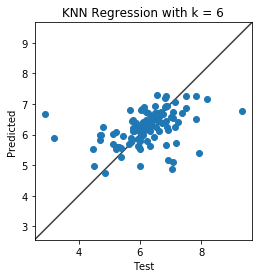

MAPE is 10.6363409039 
R-squared is 0.399004506691 


In [38]:
i= 3
knn = neighbors.KNeighborsRegressor(6, weights='distance')
y_pred = knn.fit(X_train,  y_train.iloc[:,i]).predict(X_test)

fig, ax = plt.subplots()

ax.scatter(y_test.iloc[:,i],y_pred)

plt.ylabel('Predicted')
plt.title('KNN Regression with k = 6')
plt.xlabel('Test')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

mape = maperror(y_test.iloc[:,i],y_pred)
print("MAPE is %s " % mape)

slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred, y_test.iloc[:,i])
print("R-squared is %s " % r_value)

MAPE and R-squared values are lower here with k = 6. We notice that with k = 3 or 4 values are better, but the result k = 6 comes from cross-validation so be be considered more reliable. 

###### Random Forest

We'll use another partition algorithm here like KNN : Random Forest. We first perform cross-validation on the number of decision trees used to build the forest as well as the maximum depth the trees can take.

In [39]:
reg = RandomForestRegressor()


param_grid = {
                 'n_estimators': [i for i in range(100,150,10)],
                 'max_depth': [i for i in range(3,5)]
             }

grid_clf = GridSearchCV(reg, param_grid, cv=10)
GRID = grid_clf.fit(X_train,  y_train.iloc[:,i])

GRID.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
GRID.best_estimator_[5]

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=440392314, splitter='best')

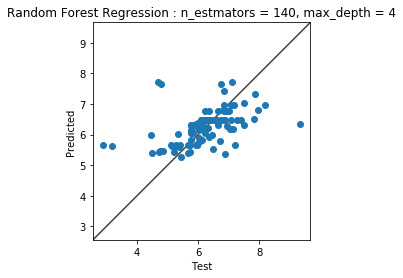

MAPE is 9.78367712815 
R-squared is 0.480687978311 


In [42]:
y_pred = GRID.predict(X_test)

fig, ax = plt.subplots()

ax.scatter(y_test.iloc[:,i],y_pred)

plt.ylabel('Predicted')
plt.title('Random Forest Regression : n_estmators = 140, max_depth = 4' )
plt.xlabel('Test')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

mape = maperror(y_test.iloc[:,i],y_pred)
print("MAPE is %s " % mape)

slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred, y_test.iloc[:,i])
print("R-squared is %s " % r_value)

Using a Random Forest Model has proven to be efficient. Since MAPE is now below 10%, and R-squared of the prediction on the test set is almost 0.5.

###### SVR

And now a kernel based regression method. In the regression case, one doesn't use a SVM but an SVR. Once again, gridesearch is applied.

In [43]:
i=3
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1,10,100],
                               "gamma": np.logspace(-2, 2, 5)})

svr.fit(X_train,  y_train.iloc[:,i])
svr.best_estimator_

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.10000000000000001, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

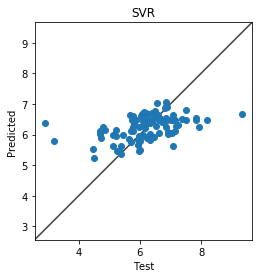

MAPE is 10.6139700019 
R-squared is 0.471392767494 


In [44]:
y_pred = svr.predict(X_test)

fig, ax = plt.subplots()

ax.scatter(y_test.iloc[:,i],y_pred)

plt.ylabel('Predicted')
plt.title('SVR')
plt.xlabel('Test')
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.show()

mape = maperror(y_test.iloc[:,i],y_pred)
print("MAPE is %s " % mape)

slope, intercept, r_value, p_value, std_err = stats.linregress(y_pred, y_test.iloc[:,i])
print("R-squared is %s " % r_value)

MAPE has gone over 10% and R-squared got lower compared to the Random Forest model.

Insert Table from Internship Report

# Conclusion 

Interestingly enough, it isn't using a Support Vector Machine Algorithm that we obtained the best results, as with the article, but with a Random Forest model. The advantage is that we can see the tree plotted by Python and determine the key factor in the analysis of our variable of interest.

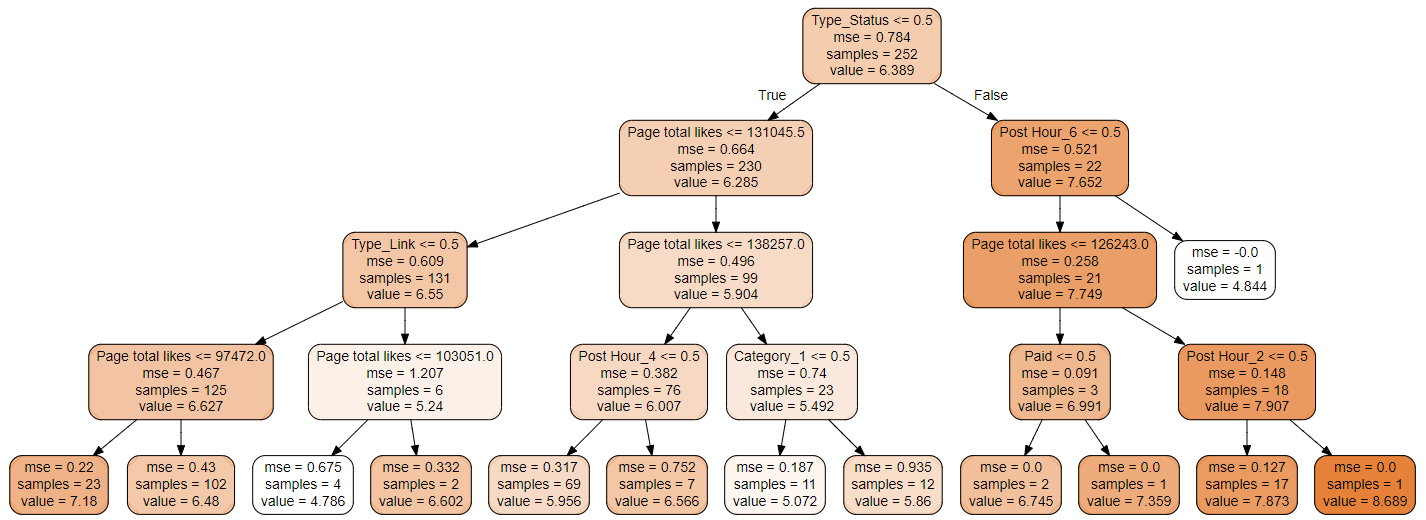

In [45]:
Image("TREE.PNG")

Above is the tree obtained from performing a Random Forest regression on the variable "Lifetime Post Users". The darker shades of the leaves show higher values of the natural logarithm of that variable. From then we have several different managerial decision tips : 

* Contraty to the paper, the month of the post doesn't appear in this model. It seems to focus more on the time at wich a post is posted. Perhaps because the number of likes is an increasing function with time, and as such the Random Forest model prefers one variable than 11 variables depicting the months of the year.
* The type variable is indeed the one that manages to separate the data in two with the most variance at the beginning. Which is why on the right are all the Status, and on the left Links, Videos and Photos.
* The best posts according to this tree are if the post is a paid status, a status posted when the page had a lot of likes or a video/photo posted when there were less people on the page
* On the other hand, the worse posts come from links posted when there weren't a lot of likes, or anything but a Status that was a Category 1, an Action.

The results and analyses presented in the paper and in this project are based on the experiments of a specific case of posts published by a cosmetic company's Facebook page during the year of 2014. Models built using data mining are purely data driven; thus, these rely on the patterns of knowledge hidden in data. If data sources change, models need to be updated,whichmay happen not only if one considers another case study, but also during the natural evolution of the context surrounding the company and the users. Also, unexpected events may have a huge impact on the predicting capabilities of models. Hence, data mining models need constant updating to incorporate these changes. Therefore, the results presented cannot be generalized. However, the experimental approach conducted can be applied to another company and period, unveiling potential useful knowledge.

Overal, this Machine Learning project helped work out a different decision flow process than the reasearch paper. Facebook page managers can use this knowledge to make informed decisions on the posts they publish, enhancing their impact, thus contributing for brand building. Yet even more can be done ! More variables could be extracted specifically from the Status/Photo/Video posts. Sentiment analysis, Natural Language Processing and Image Recognition could feed this model more features and help determine what really incites people to like, share and comment on a Facebook post.

###### PCA

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_regressors)
out = pca.transform(df_regressors)

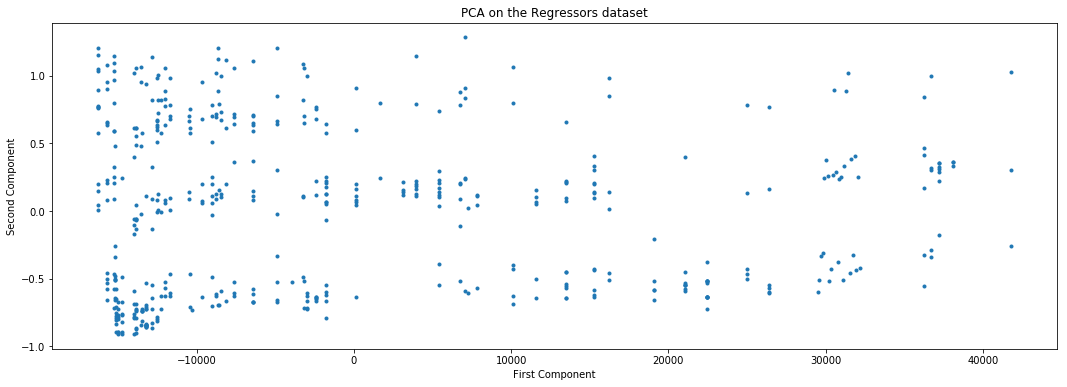

In [47]:
plt.figure(figsize=(18,6))
plt.xlabel("First Component")
plt.ylabel("Second Component")
plt.title('PCA on the Regressors dataset')
plt.plot(out[:,0], out[:,1], ".");

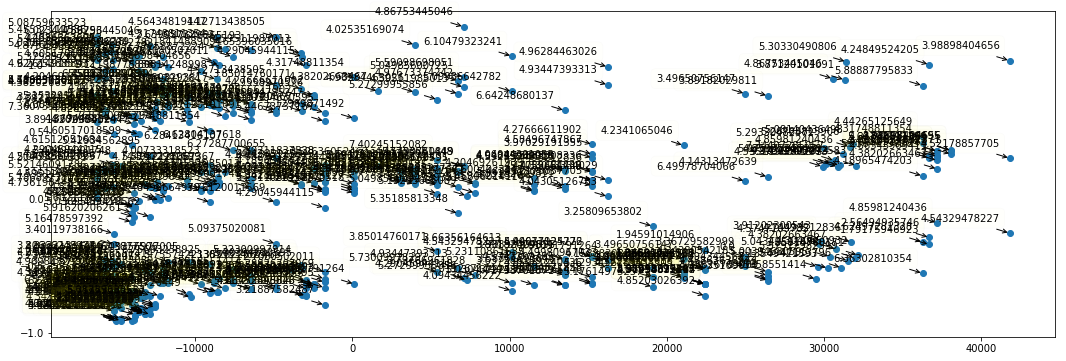

In [48]:
plt.figure(figsize=(18,6))
plt.scatter(out[:, 0],out[:, 1])

for label, x, y in zip(df_others['like'], out[:, 0], out[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.01),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))